Code: Alexis Aubel (alexis.aubel@gmail.com)

In [1]:
sim_name = [
    'MeanWind_Exp003_I2p0_30day_Hourly',                      #Hourly, 3D, with MFx
]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import Utils as utils

In [3]:
sim_nb = len(sim_name)
dataset_1D, dataset_2D = utils.import_from_name(sim_name)

In [8]:
############################################ COORDINATES ############################################
t = []
x = []
y = []
GRID_SIZE = []
for case in range(sim_nb):
    t.append(dataset_2D[case].coords['time'].values)
    x.append(dataset_2D[case].coords['x'].values)
    y.append(dataset_2D[case].coords['y'].values)
    GRID_SIZE.append(x[case][-1])

In [5]:
############################################# VARIABLES #############################################
PW = []
U_surf = []
V_surf = []
for case in range(sim_nb):
    PW.append(np.array(dataset_2D[case]['PW']))
    U_surf.append(dataset_2D[case]['USFC'])
    V_surf.append(dataset_2D[case]['VSFC'])

In [6]:
#Computing the PW Barycentre
cloud_center = []
for case in range(sim_nb):
    cloud_center.append(np.array(utils.compute_barycenter_list(PW[case], GRID_SIZE[case], tolerance=0.7)))

In [9]:
#Moving referential
centered_PW = [[] for _ in range(sim_nb)]
centered_U = [[] for _ in range(sim_nb)]
centered_V = [[] for _ in range(sim_nb)]

for case in range(sim_nb):
    for i in range(len(t[case])):
        try:
            centered_PW[case].append(np.copy(utils.recenter_matrix(np.copy(PW[case][i]), [cloud_center[case][i][j]*256/GRID_SIZE[case]%256 for j in range(2)])))
            centered_U[case].append(np.copy(utils.recenter_matrix(np.copy(U_surf[case][i]), [cloud_center[case][i][j]*256/GRID_SIZE[case]%256 for j in range(2)])))
            centered_V[case].append(np.copy(utils.recenter_matrix(np.copy(V_surf[case][i]), [cloud_center[case][i][j]*256/GRID_SIZE[case]%256 for j in range(2)])))

        except IndexError:
            break
    

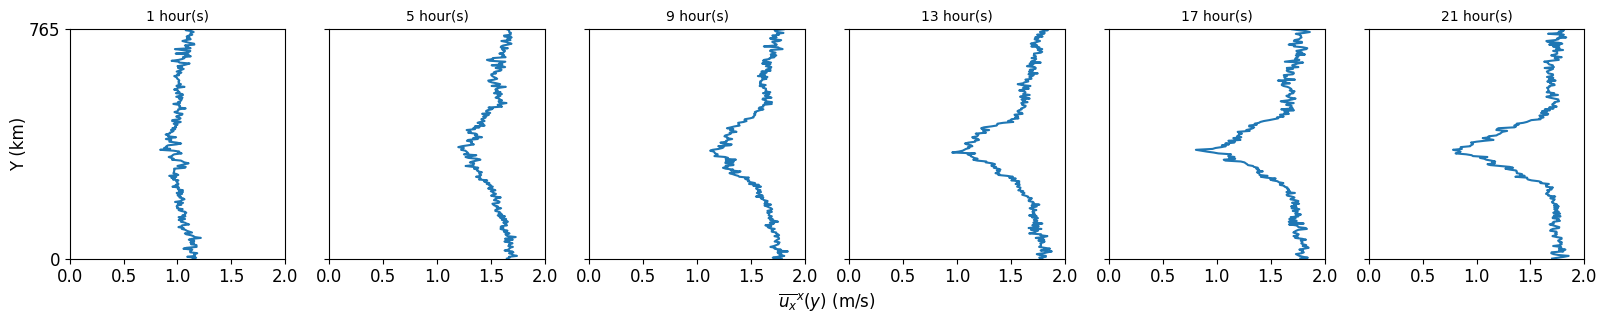

In [10]:
plt.rcParams.update({'font.size': 12})
case = 0
n_plot, n_col = 6, 6
n_line = int((n_plot-1)/n_col)+1
figure, axis = plt.subplots(n_line, n_col, sharex=True, sharey=True)
axis = [[ax] for ax in axis] if n_col==1 else axis
axis = [axis] if n_line==1 else axis
figure.set_figwidth(16)
figure.set_figheight(3)
figure.tight_layout()

X = x[case]/1000
Y = y[case]/1000
T = (t[case]-100)*24
for i in range(n_line):
    for j in range(n_col):
        plot_nb = (i*n_col + j)*4           
        axis[i][j].set_xlim(0,2)
        axis[i][j].set_ylim(0,765)
        axis[i][j].set_yticks([0,765])
        axis[i][j].set_title(str(round(T[plot_nb])) + ' hour(s)', size=10)
        prof_wind = np.mean(centered_U[case][plot_nb:plot_nb+5], axis=(0,2))
            
        try:
            axis[i][j].plot(prof_wind, y[case]/1000)
        except IndexError:
            pass

lbl_ax = figure.add_subplot(111, frameon=False)
lbl_ax.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
lbl_ax.set_xlabel('$\overline{u_x}^x(y)$ (m/s)')
lbl_ax.set_ylabel('Y (km)')
figure.show()